In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\indra\Downloads\learning-of-structured-data-fhws-ws2324\Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
data.shape

(270, 14)

In [4]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
X=data.iloc[:,0:-1]
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [6]:
y = data['Heart Disease']
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

In [7]:
# replacing presence with 1, and absence with 0.
data['Heart Disease'] = data['Heart Disease'].replace('Presence', 1)
data['Heart Disease'] = data['Heart Disease'].replace('Absence', 0)

data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# load the Label Encoder function
label_encode = LabelEncoder()

In [10]:
labels = label_encode.fit_transform(data['Heart Disease'])

In [11]:
data['Heart Disease'] = labels

In [12]:
data['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

In [13]:
data.std()

Age                         9.109067
Sex                         0.468195
Chest pain type             0.950090
BP                         17.861608
Cholesterol                51.686237
FBS over 120                0.355906
EKG results                 0.997891
Max HR                     23.165717
Exercise angina             0.470952
ST depression               1.145210
Slope of ST                 0.614390
Number of vessels fluro     0.943896
Thallium                    1.940659
Heart Disease               0.497827
dtype: float64

In [14]:
y = data['Heart Disease']
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

<Axes: >

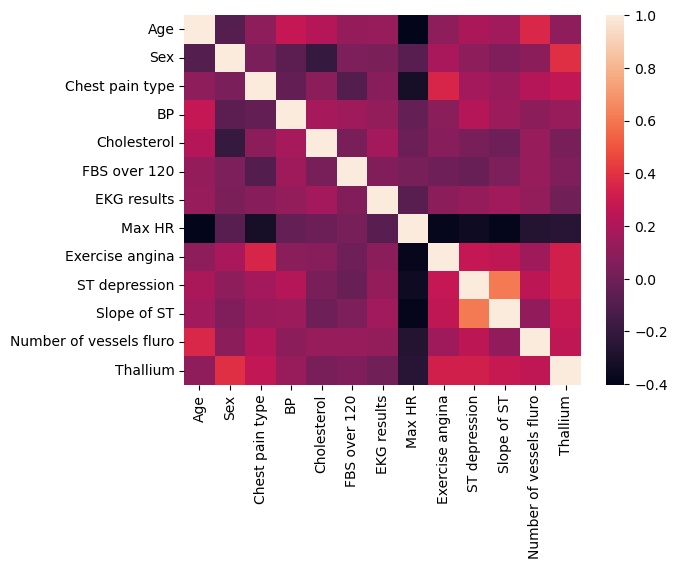

In [15]:
x=data.iloc[:,0:-1].corr()
sns.heatmap(x)

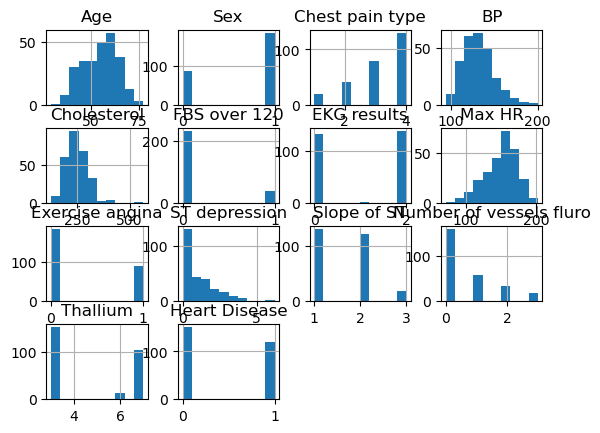

In [16]:
data.hist()

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [21]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1437788887760995


In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy score:  0.7941176470588235
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.73      0.79      0.76        28

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



Confusion matrix:
[[32  8]
 [ 6 22]]


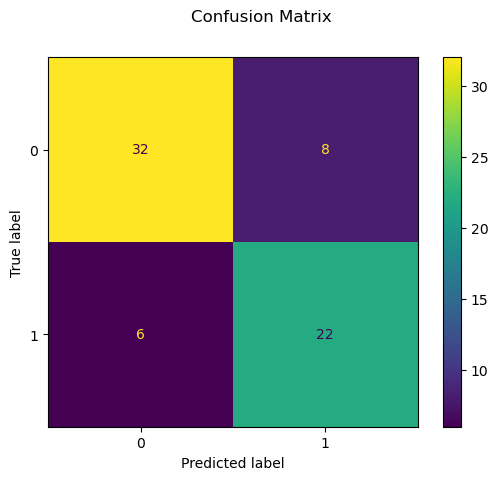

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

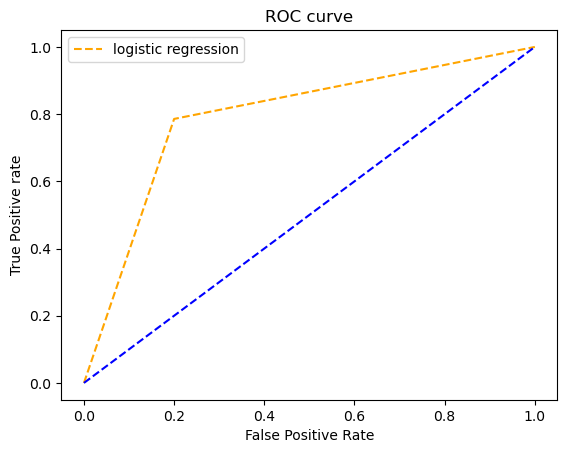

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score1 = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='logistic regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  8]
 [ 7 21]]


0.7794117647058824

In [30]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy score:  0.7794117647058824
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.72      0.75      0.74        28

    accuracy                           0.78        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.78      0.78      0.78        68



In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  8]
 [ 6 22]]


0.7941176470588235

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  8]
 [ 7 21]]


0.7794117647058824

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred_N = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_N)
print(cm)
accuracy_score(y_test, y_pred_N)

[[32  8]
 [ 7 21]]


0.7794117647058824

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  8]
 [ 8 20]]


0.7647058823529411

In [43]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy score:  0.7647058823529411
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.71      0.71      0.71        28

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68



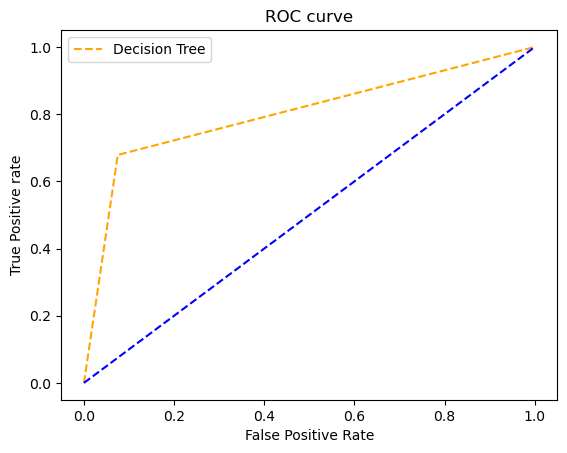

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score1 = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  3]
 [ 9 19]]


0.8235294117647058

In [48]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy score:  0.8235294117647058
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.86      0.68      0.76        28

    accuracy                           0.82        68
   macro avg       0.83      0.80      0.81        68
weighted avg       0.83      0.82      0.82        68



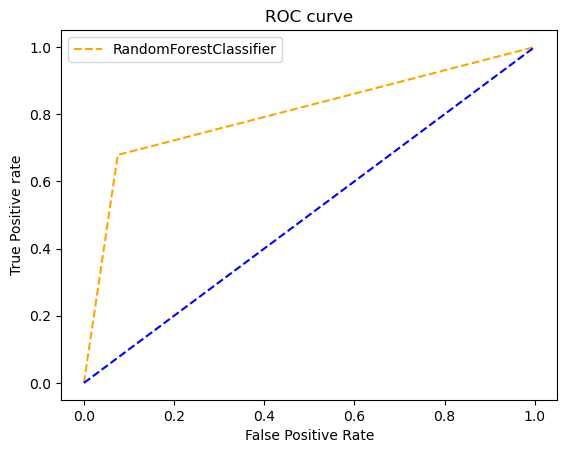

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score1 = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();